In [1]:
from mylinearregression import MyLinearRegression as MyLR
from polynomial_model import add_polynomial_features
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot(x, cx, y, y_hat, labels, colors):
    try:
        plt.plot(x, y, 'o', color=colors[0], label=labels[0])
        plt.plot(cx, y_hat, '-', color=colors[1], label=labels[1])
        plt.xlabel(labels[2])
        plt.ylabel(labels[3])
        plt.legend()
        plt.show()
    except Exception as err:
        print(err)

In [3]:
def regress(x, y, thetas, alpha, max_iter, labels, colors):
    try:
        print("------------")
        lm = MyLR(thetas, alpha=alpha, max_iter=max_iter)
        lm.fit_(x, y)
        y_pred = lm.predict_(x)
        mse = lm.loss_(y, y_pred)
        print("Score: {0}".format(mse))
        continuous_x = add_polynomial_features(np.arange(np.min(x[:,0]), np.max(x[:,0]), 0.01).reshape(-1,1), x.shape[1])
        y_pred = lm.predict_(continuous_x)
        plot(x[:,0], continuous_x[:,0], y, y_pred, labels, colors)
        print("------------")
    except Exception as err:
        print(err)

In [4]:
data = pd.read_csv("../ressources/are_blue_pills_magics.csv")

In [5]:
data.head()

,Patient,Micrograms,Score
0,1,1.17,78.93
1,2,2.97,58.20
2,3,3.26,67.47
3,4,4.69,37.47
4,5,5.83,45.65


In [6]:
data.shape

(7, 3)

In [7]:
x = np.array(data['Micrograms']).reshape(-1, 1)
y = np.array(data['Score']).reshape(-1, 1)
x.shape, y.shape

((7, 1), (7, 1))

In [8]:
lst_x = [add_polynomial_features(x, 1)]

for i in range(2, 7):
    lst_x.append(add_polynomial_features(x, i))
len(lst_x)

6

In [9]:
alpha=0.0000000001
max_iter=1000000

------------
Score: 18.134380629262218


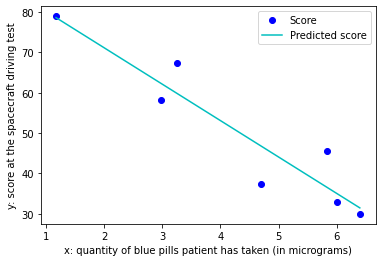

------------
------------
Score: 17.9352708807784


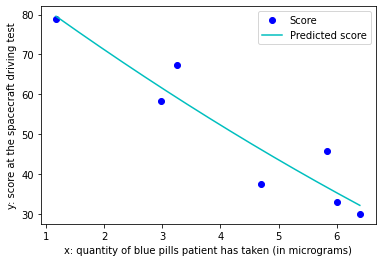

------------
------------
Score: 17.55321420930126


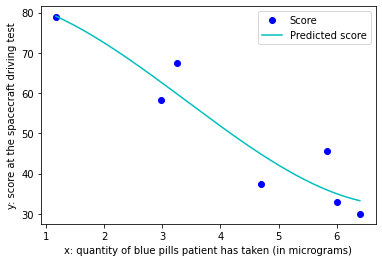

------------
------------
Score: 14.574309641098925


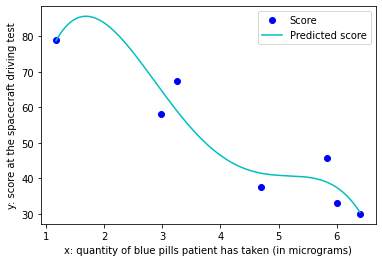

------------
------------
Score: 7.081842042193423


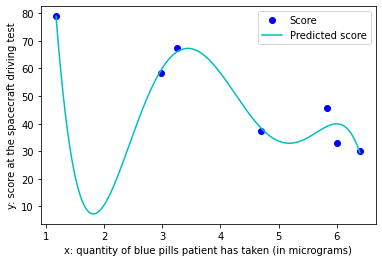

------------
------------
Score: 1.880997367488295e-08


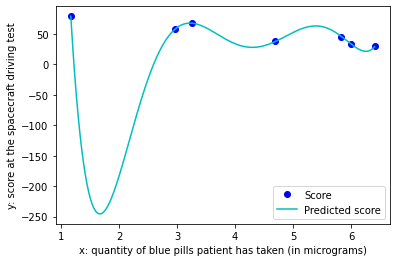

------------


In [10]:
for i in range(0, 6):
    regress(lst_x[i], y, MyLR.normal_eq(lst_x[i], y), alpha, max_iter,
        ['Score', 'Predicted score', "x: quantity of blue pills patient has taken (in micrograms)", "y: score at the spacecraft driving test"],
        ['b', 'c'])